In [1]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [2]:
df = pd.read_excel("/content/IndiaDataset.xlsx")
df

,From Date,To Date,Ozone,CO,SO2,NO2,PM10,PM2.5,State,City,Station
0,01-08-2021 00:00,02-08-2021 00:00,21.85,0.35,10.97,6.65,20.35,5.46,Andhra Pradesh,Amaravati,"Secretariat, Amaravati - APPCB"
1,02-08-2021 00:00,03-08-2021 00:00,23.57,0.39,11.88,7.20,24.83,7.07,Andhra Pradesh,Amaravati,"Secretariat, Amaravati - APPCB"
2,03-08-2021 00:00,04-08-2021 00:00,22.40,0.35,11.86,8.41,28.16,6.96,Andhra Pradesh,Amaravati,"Secretariat, Amaravati - APPCB"
3,04-08-2021 00:00,05-08-2021 00:00,20.71,0.41,11.49,7.60,20.86,5.09,Andhra Pradesh,Amaravati,"Secretariat, Amaravati - APPCB"
4,05-08-2021 00:00,06-08-2021 00:00,20.84,0.31,15.08,7.09,26.44,5.91,Andhra Pradesh,Amaravati,"Secretariat, Amaravati - APPCB"
...,...,...,...,...,...,...,...,...,...,...,...
176086,27-07-2023 00:00,28-07-2023 00:00,24.90,0.28,4.33,13.67,27.71,11.69,West Bengal,Kolkata,"Ballygunge, Kolkata - WBPCB"
176087,28-07-2023 00:00,29-07-2023 00:00,24.97,0.30,10.4,14.17,28.48,11.15,West Bengal,Kolkata,"Ballygunge, Kolkata - WBPCB"
176088,29-07-2023 00:00,30-07-2023 00:00,26.56,0.37,6.6,12.74,31.17,14.66,West Bengal,Kolkata,"Ballygunge, Kolkata - WBPCB"
176089,30-07-2023 00:00,31-07-2023 00:00,27.25,0.36,4.25,14.02,36.27,15.09,West Bengal,Kolkata,"Ballygunge, Kolkata - WBPCB"


In [3]:
df.isnull().sum()

,0
From Date,0
To Date,0
Ozone,913
CO,989
SO2,367
NO2,99
PM10,128
PM2.5,963
State,0
City,0


In [5]:
df['Ozone'].fillna(df['Ozone'].mean(), inplace=True)

<ipython-input-5-0bae002eda0b>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Ozone'].fillna(df['Ozone'].mean(), inplace=True)


In [6]:
df.isnull().sum()

,0
From Date,0
To Date,0
Ozone,0
CO,989
SO2,367
NO2,99
PM10,128
PM2.5,963
State,0
City,0


In [8]:
df['CO'].fillna(df['CO'].mean(), inplace=True)

df['SO2'] = pd.to_numeric(df['SO2'], errors='coerce')
df['SO2'].fillna(df['SO2'].mean(), inplace=True)

df['NO2'].fillna(df['NO2'].mean(), inplace=True)

df['PM10'].fillna(df['PM10'].mean(), inplace=True)

df['PM2.5'].fillna(df['PM2.5'].mean(), inplace=True)


<ipython-input-8-1f356f5eb5ee>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['CO'].fillna(df['CO'].mean(), inplace=True)
<ipython-input-8-1f356f5eb5ee>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'd

In [9]:
df.isnull().sum()

,0
From Date,0
To Date,0
Ozone,0
CO,0
SO2,0
NO2,0
PM10,0
PM2.5,0
State,0
City,0


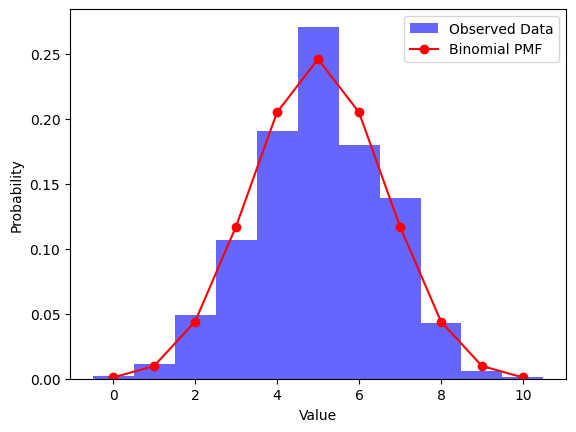

In [4]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Generate a sample dataset (replace this with your actual data)
data = np.random.binomial(n=10, p=0.5, size=1000)  # Example binomial data

# 1. Plot Histogram and Compare with Binomial PMF
n = 10  # Number of trials (adjust accordingly)
p = 0.5  # Probability of success (estimate from data)

plt.hist(data, bins=np.arange(n+2)-0.5, density=True, alpha=0.6, color='b', label="Observed Data")

# Theoretical Binomial Distribution
x = np.arange(0, n+1)
pmf = stats.binom.pmf(x, n, p)
plt.plot(x, pmf, 'ro-', label="Binomial PMF")

plt.xlabel('Value')
plt.ylabel('Probability')
plt.legend()
plt.show()

In [35]:
aqi_breakpoints = {
    "PM2.5": [(0, 12, 0, 50), (12.1, 35.4, 51, 100), (35.5, 55.4, 101, 150),
              (55.5, 150.4, 151, 200), (150.5, 250.4, 201, 300), (250.5, 500.4, 301, 500)],

    "PM10": [(0, 54, 0, 50), (55, 154, 51, 100), (155, 254, 101, 150),
             (255, 354, 151, 200), (355, 424, 201, 300), (425, 604, 301, 500)],

    "NO2": [(0, 53, 0, 50), (54, 100, 51, 100), (101, 360, 101, 150),
            (361, 649, 151, 200), (650, 1249, 201, 300), (1250, 2049, 301, 500)],

    "SO2": [(0, 35, 0, 50), (36, 75, 51, 100), (76, 185, 101, 150),
            (186, 304, 151, 200), (305, 604, 201, 300), (605, 1004, 301, 500)],

    "CO": [(0, 4.4, 0, 50), (4.5, 9.4, 51, 100), (9.5, 12.4, 101, 150),
           (12.5, 15.4, 151, 200), (15.5, 30.4, 201, 300), (30.5, 50.4, 301, 500)],

    "Ozone": [(0, 54, 0, 50), (55, 70, 51, 100), (71, 85, 101, 150),
              (86, 105, 151, 200), (106, 200, 201, 300), (201, 300, 301, 500)]
}

In [36]:
def calculate_aqi(pollutant, concentration):
    breakpoints = aqi_breakpoints[pollutant]

    for C_low, C_high, I_low, I_high in breakpoints:
        if C_low <= concentration <= C_high:
            AQI = ((I_high - I_low) / (C_high - C_low)) * (concentration - C_low) + I_low
            return round(AQI)
    return 500  # If concentration exceeds the last breakpoint

# Sample DataFrame (Replace this with actual sensor data)
df = pd.DataFrame({
    "PM2.5": [20, 40, 80, 150],
    "PM10": [60, 100, 200, 300],
    "NO2": [30, 70, 150, 400],
    "SO2": [20, 50, 100, 200],
    "CO": [3, 6, 10, 20],
    "Ozone": [40, 60, 100, 180]
})

In [37]:
for pollutant in aqi_breakpoints.keys():
    df[f"AQI_{pollutant}"] = df[pollutant].apply(lambda x: calculate_aqi(pollutant, x))

In [38]:
df["AQI"] = df[[f"AQI_{pollutant}" for pollutant in aqi_breakpoints.keys()]].max(axis=1)

In [39]:
print(df)

   PM2.5  PM10  NO2  SO2  CO  Ozone  AQI_PM2.5  AQI_PM10  AQI_NO2  AQI_SO2  \
0     20    60   30   20   3     40         68        53       28       29   
1     40   100   70   50   6     60        112        73       68       69   
2     80   200  150  100  10    100        164       123      110      112   
3    150   300  400  200  20    180        200       173      158      157   

   AQI_CO  AQI_Ozone  AQI  
0      34         37   68  
1      66         67  112  
2     109        187  187  
3     231        279  279  


In [40]:
features = ["CO", "NO2", "SO2", "PM10", "PM2.5", "Ozone"]
target = "AQI"

In [41]:
scaler = MinMaxScaler()
df[features] = scaler.fit_transform(df[features])

In [42]:
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=42)

In [43]:
model = XGBRegressor(n_estimators=100, learning_rate=0.05, max_depth=5)
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [44]:
y_pred = model.predict(X_test)
print("XGBoost MAE:", mean_absolute_error(y_test, y_pred))
print("XGBoost MSE:", mean_squared_error(y_test, y_pred))

XGBoost MAE: 35.25310516357422
XGBoost MSE: 1242.7813720703125


In [45]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_absolute_error

In [46]:
xgb_model = xgb.XGBRegressor(objective="reg:squarederror", random_state=42)

# Define the hyperparameter grid
param_grid = {
    "n_estimators": [100, 200, 300, 500],
    "max_depth": [3, 5, 7, 10],
    "learning_rate": [0.01, 0.05, 0.1, 0.2],
    "subsample": [0.6, 0.8, 1.0],
    "colsample_bytree": [0.6, 0.8, 1.0],
    "gamma": [0, 0.1, 0.2, 0.5]
}

In [49]:
random_search = RandomizedSearchCV(
    xgb_model, param_distributions=param_grid, n_iter=20,
    scoring="neg_mean_absolute_error", cv=3, verbose=2, n_jobs=-1, random_state=42
)

In [50]:
random_search.fit(X_train, y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


RandomizedSearchCV(cv=3,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                          n_estimators=None, n_jobs=None,
                                          num_parallel_tree=None,
                                          random_state=42, ...),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.6, 0.8, 1.0],
                                        'gamma': [0, 0.1, 0.2, 0.5],
                                        'learning_rate': [0.01, 0.05, 0.1, 0.2],
                                        'max_depth': [3, 5, 7, 10],
                                        'n_estimators': [100, 200, 300, 500],
                                        'subsample': [0.6, 0.8, 1.0]},
                   random_state=42, scoring='neg_mean_absolute_error',
                   verbose=2)

In [51]:
print("Best Parameters:", random_search.best_params_)

Best Parameters: {'subsample': 0.8, 'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.01, 'gamma': 0, 'colsample_bytree': 0.8}


In [52]:
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)

In [53]:
print(f"Improved XGBoost MAE: {mae}")

Improved XGBoost MAE: 22.634735107421875


In [56]:
import joblib
joblib.dump(best_model, "xgboost_aqi_model.pkl")


['xgboost_aqi_model.pkl']

In [57]:
import xgboost as xgb
import joblib
model = joblib.load("xgboost_aqi_model.pkl")

In [60]:
def predict_aqi():
    print("Enter the pollutant concentrations (in µg/m³ for PM, ppm for gases):")

    PM2_5 = float(input("PM2.5: "))
    PM10 = float(input("PM10: "))
    NO2 = float(input("NO2: "))
    SO2 = float(input("SO2: "))
    CO = float(input("CO (in ppm): "))
    Ozone = float(input("Ozone: "))

    user_input = np.array([[PM2_5, PM10, NO2, SO2, CO, Ozone]])
    predicted_aqi = model.predict(user_input)[0]
    print(f"\nPredicted AQI: {round(predicted_aqi)}")
predict_aqi()

Enter the pollutant concentrations (in µg/m³ for PM, ppm for gases):
PM2.5: 35
PM10: 80
NO2: 50
SO2: 20
CO (in ppm): 0.8
Ozone: 100

Predicted AQI: 218
